In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
X = pd.read_csv('Linear_X_Train.csv')
Y = pd.read_csv('Linear_Y_Train.csv')
Y.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


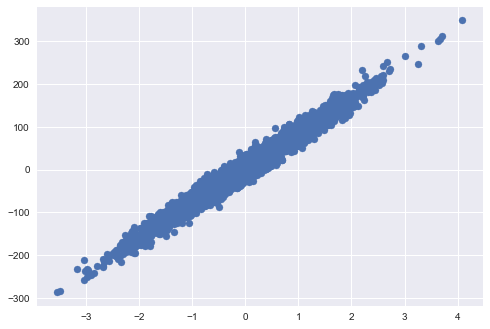

In [13]:
plt.style.use('seaborn')
plt.scatter(X,y)

In [17]:
X.shape

(3750, 1)

In [5]:
# Convert X , y to Numpy arrays
X = X.values
Y = Y.values

# Normalisation
u = X.mean()
std = X.std()
# print(u,std)
X = (X-u)/std

Text(0.5, 1.0, 'Hardwork vs Performance')

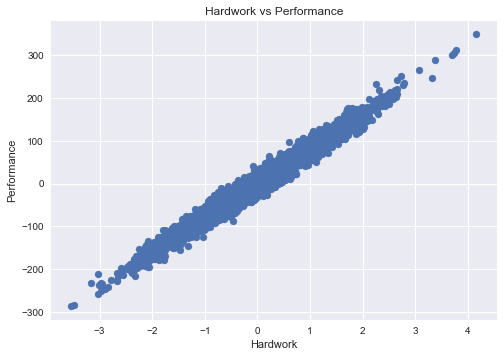

In [6]:
plt.style.use('seaborn')
plt.scatter(X,Y)
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.title('Hardwork vs Performance')

#  Section 2 - Linear Regression

In [7]:
def hypothesis(x,theta):
#     theta = [theta0 + theta1]
      y_ = theta[0] + theta[1]*x
      return y_

In [8]:
def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m    

In [9]:
def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
    return total_error/m    

In [39]:
def gradientDescent(X,Y,learning_rate=0.1):
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    max_steps = 100
    for i in range(max_steps):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        theta_list.append((theta[0],theta[1]))
        
    return theta , error_list , theta_list

In [40]:
theta , error_list , theta_list = gradientDescent(X,Y)

In [41]:
theta_list

[(0.06838689680155924, 7.990573694249979),
 (0.12993510392296198, 15.182090019074964),
 (0.18532849033222443, 21.654454711417454),
 (0.23518253810056078, 27.479582934525695),
 (0.2800511810920641, 32.72219833532309),
 (0.3204329597844162, 37.44055219604077),
 (0.35677656060753327, 41.68707067068668),
 (0.3894858013483388, 45.508937297867995),
 (0.41892411801506385, 48.94861726233117),
 (0.4454186030151161, 52.044329230348026),
 (0.46926363951516337, 54.83047000156319),
 (0.490724172365206, 57.337996695656855),
 (0.5100386519302443, 59.594770720341145),
 (0.5274216835387786, 61.62586734255701),
 (0.5430664119864597, 63.45385430255129),
 (0.5571466675893725, 65.09904256654615),
 (0.569818897631994, 66.57971200414151),
 (0.5812239046703536, 67.91231449797735),
 (0.591488411004877, 69.11165674242959),
 (0.6007264667059482, 70.19106476243661),
 (0.6090407168369123, 71.16253198044294),
 (0.6165235419547797, 72.03685247664862),
 (0.6232580845608605, 72.82374092323374),
 (0.6293191729063334, 7

In [34]:
error_list

[array([6576.35005246]),
 array([5363.12510257]),
 array([4380.41289317]),
 array([3584.41600355]),
 array([2939.65852295]),
 array([2417.40496367]),
 array([1994.37958066]),
 array([1651.72902041]),
 array([1374.18206661]),
 array([1149.36903404]),
 array([967.27047765]),
 array([819.77064698]),
 array([700.29578413]),
 array([603.52114523]),
 array([525.13368772]),
 array([461.63984713]),
 array([410.20983626]),
 array([368.55152745]),
 array([334.80829731]),
 array([307.47628091]),
 array([285.33734761]),
 array([267.40481165]),
 array([252.87945752]),
 array([241.11392067]),
 array([231.58383582]),
 array([223.8644671]),
 array([217.61177843]),
 array([212.54710061]),
 array([208.44471157]),
 array([205.12177646]),
 array([202.43019901]),
 array([200.25002128]),
 array([198.48407732]),
 array([197.05366271]),
 array([195.89502687]),
 array([194.95653185]),
 array([194.19635088]),
 array([193.58060429]),
 array([193.08184956]),
 array([192.67785822]),
 array([192.35062524]),
 array(

Text(0.5, 1.0, 'Reduction of error')

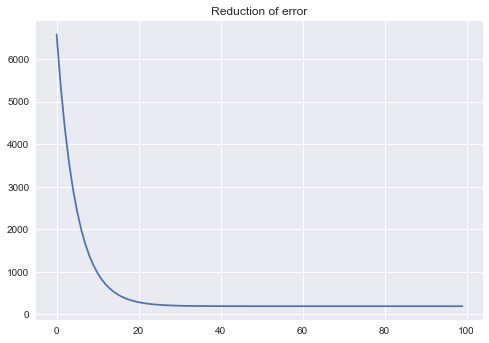

In [13]:
plt.plot(error_list)
plt.title('Reduction of error')

#  Section 3 - Prediction and Best Line

In [14]:
y_ = hypothesis(X,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


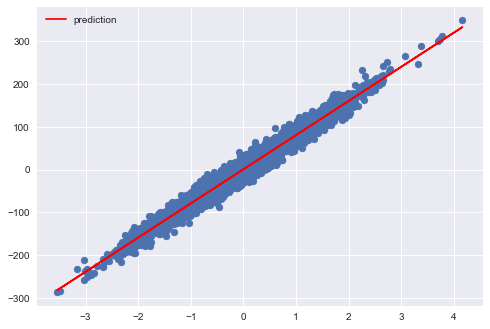

In [15]:
plt.scatter(X,Y)
plt.plot(X,y_,color='red',label='prediction')
plt.legend()

# Section 4 - Working with test data

In [16]:
X_test = pd.read_csv('Linear_X_Test.csv').values
# X_test.head()
y_test = hypothesis(X_test,theta)

In [45]:
y_test.shape

(1250, 1)

In [17]:
df = pd.DataFrame(data=y_test,columns=['y'])
df.to_csv('y_prediction.csv',index=False)

#  Section 5 - Computing Score

R2 score 

In [47]:
def r2_score(Y,y_):
    num = np.sum((Y-y_)**2)
    denom = np.sum((Y-Y.mean())**2)
    
    score = (1 - num/denom)
    
    return score*100

In [49]:
r2_score(Y,y_)

97.09612226971643

#  Section 6  - Visualising Loss Function , Gradient Descent , Theta Updates

In [48]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [49]:
theta

array([ 0.6838508 , 79.90361453])

In [50]:
T0 = np.arange(-50,50,1)
T1 = np.arange(40,120,1)

In [51]:
T0, T1

(array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
        -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
        -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
        -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
          2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49]),
 array([ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 1

In [52]:
T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((Y-y_)**2)/Y.shape[0]
print(J)        

[[4352.27799386 4251.91025593 4153.54251799 ... 3928.60741407
  4022.23967613 4117.8719382 ]
 [4273.46651998 4173.09878204 4074.73104411 ... 3849.79594018
  3943.42820225 4039.06046431]
 [4196.65504609 4096.28730816 3997.91957022 ... 3772.9844663
  3866.61672836 3962.24899043]
 ...
 [4135.79450472 4035.42676678 3937.05902885 ... 3712.12392492
  3805.75618699 3901.38844905]
 [4210.98303083 4110.6152929  4012.24755496 ... 3787.31245104
  3880.9447131  3976.57697517]
 [4288.17155695 4187.80381901 4089.43608108 ... 3864.50097715
  3958.13323922 4053.76550128]]


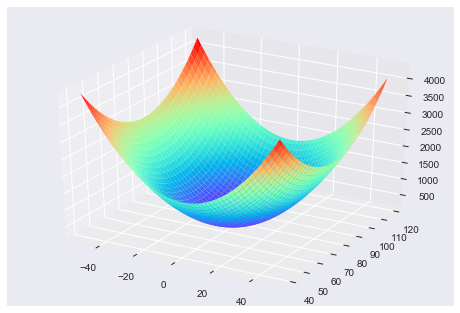

In [53]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')

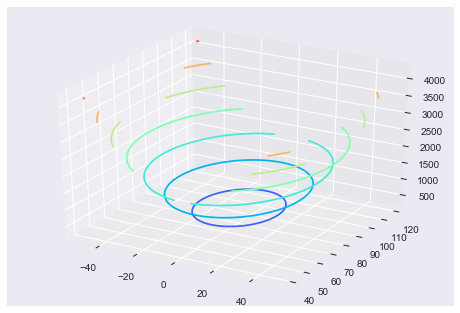

In [54]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')

plot the changes in theta_list

In [55]:
theta_list = np.array(theta_list)

In [56]:
theta_list

array([[6.83868968e-02, 7.99057369e+00],
       [1.29935104e-01, 1.51820900e+01],
       [1.85328490e-01, 2.16544547e+01],
       [2.35182538e-01, 2.74795829e+01],
       [2.80051181e-01, 3.27221983e+01],
       [3.20432960e-01, 3.74405522e+01],
       [3.56776561e-01, 4.16870707e+01],
       [3.89485801e-01, 4.55089373e+01],
       [4.18924118e-01, 4.89486173e+01],
       [4.45418603e-01, 5.20443292e+01],
       [4.69263640e-01, 5.48304700e+01],
       [4.90724172e-01, 5.73379967e+01],
       [5.10038652e-01, 5.95947707e+01],
       [5.27421684e-01, 6.16258673e+01],
       [5.43066412e-01, 6.34538543e+01],
       [5.57146668e-01, 6.50990426e+01],
       [5.69818898e-01, 6.65797120e+01],
       [5.81223905e-01, 6.79123145e+01],
       [5.91488411e-01, 6.91116567e+01],
       [6.00726467e-01, 7.01910648e+01],
       [6.09040717e-01, 7.11625320e+01],
       [6.16523542e-01, 7.20368525e+01],
       [6.23258085e-01, 7.28237409e+01],
       [6.29319173e-01, 7.35319405e+01],
       [6.347741

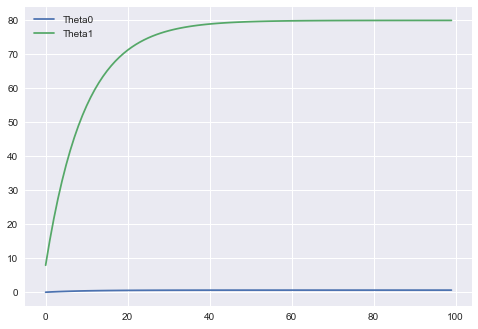

In [57]:
plt.plot(theta_list[:,0],label='Theta0')
plt.plot(theta_list[:,1],label='Theta1')
plt.legend()

# Trajectory traced by Theta Updates in the Loss Function

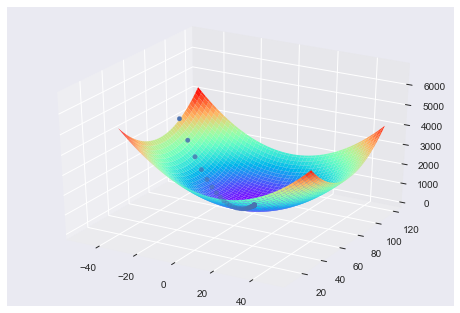

In [58]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)

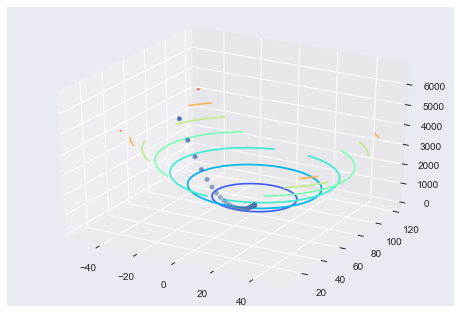

In [59]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)

In [ ]:
# 2d contour plot

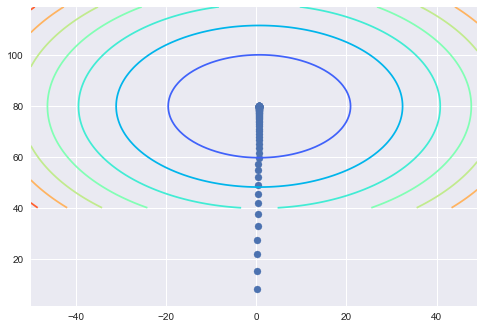

In [61]:
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1])

In [ ]:
# save the data in the file

In [62]:
theta_list
np.save('Theta_list.npy',theta_list)
